In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
engine = create_engine("sqlite:////Users/nathanieldirenzo/Documents/GitHub/NBM_EDA_Student/resources/get_mta/mta_data.db")

In [3]:
df = pd.read_sql('SELECT * FROM mta_data ORDER BY RANDOM() LIMIT 100000;', engine)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,N030,R333,00-00-00,116 ST,BC,IND,03/02/2021,16:00:00,REGULAR,48886,87777
1,PTH22,R540,00-00-03,PATH NEW WTC,1,PTH,01/08/2021,23:13:10,REGULAR,354630,156015
2,N095A,R014,01-03-05,FULTON ST,2345ACJZ,IND,03/19/2021,17:00:00,REGULAR,1375478,2807474
3,R321,R386,01-00-00,174 ST,25,IRT,07/19/2021,13:00:00,REGULAR,2142506,6340419
4,N016A,R296,00-03-01,163 ST-AMSTERDM,C,IND,01/22/2021,16:00:00,REGULAR,13702,30112


In [4]:
df = df.rename(columns={'C/A': 'control_area', 'UNIT': 'unit', 'SCP': 'subunit_channel_pos', 'STATION':'station', 'LINENAME':'subway_lines', 'DIVISION':'division', 'DATE':'date', 'TIME':'time', 'DESC':'desc', 'ENTRIES':'entries', 'EXITS':'exits'})

In [5]:
df= df.sort_values(by=['control_area', 'unit', 'subunit_channel_pos', 'station', 'date', 'time'])

In [6]:
df['date_time'] = df.date + ' ' + df.time

In [7]:
df.head()

,control_area,unit,subunit_channel_pos,station,subway_lines,division,date,time,desc,entries,exits,date_time
34533,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,03:00:00,REGULAR,7511653,2558871,01/02/2021 03:00:00
26297,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/10/2021,11:00:00,REGULAR,7515258,2560488,01/10/2021 11:00:00
33032,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2021,19:00:00,REGULAR,7533699,2568851,02/19/2021 19:00:00
97438,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/21/2021,03:00:00,REGULAR,7534200,2569015,02/21/2021 03:00:00
52901,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2021,16:00:00,REGULAR,7547781,2575318,03/21/2021 16:00:00


In [8]:
df['net_entries'] = df.entries.diff()
df['net_exits'] = df.exits.diff()
df['net_traffic'] = df.entries.diff() + df.exits.diff()

In [9]:
df.head()

,control_area,unit,subunit_channel_pos,station,subway_lines,division,date,time,desc,entries,exits,date_time,net_entries,net_exits,net_traffic
34533,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,03:00:00,REGULAR,7511653,2558871,01/02/2021 03:00:00,NaN,NaN,NaN
26297,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/10/2021,11:00:00,REGULAR,7515258,2560488,01/10/2021 11:00:00,3605.0,1617.0,5222.0
33032,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2021,19:00:00,REGULAR,7533699,2568851,02/19/2021 19:00:00,18441.0,8363.0,26804.0
97438,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/21/2021,03:00:00,REGULAR,7534200,2569015,02/21/2021 03:00:00,501.0,164.0,665.0
52901,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2021,16:00:00,REGULAR,7547781,2575318,03/21/2021 16:00:00,13581.0,6303.0,19884.0


In [10]:
df.date_time = pd.to_datetime(df['date_time'])

In [11]:
df['audit_length_hours'] = df.date_time.diff() / pd.Timedelta(hours=1)

In [12]:
df.head()

,control_area,unit,subunit_channel_pos,station,subway_lines,division,date,time,desc,entries,exits,date_time,net_entries,net_exits,net_traffic,audit_length_hours
34533,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,03:00:00,REGULAR,7511653,2558871,2021-01-02 03:00:00,NaN,NaN,NaN,NaN
26297,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/10/2021,11:00:00,REGULAR,7515258,2560488,2021-01-10 11:00:00,3605.0,1617.0,5222.0,200.0
33032,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2021,19:00:00,REGULAR,7533699,2568851,2021-02-19 19:00:00,18441.0,8363.0,26804.0,968.0
97438,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/21/2021,03:00:00,REGULAR,7534200,2569015,2021-02-21 03:00:00,501.0,164.0,665.0,32.0
52901,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2021,16:00:00,REGULAR,7547781,2575318,2021-03-21 16:00:00,13581.0,6303.0,19884.0,685.0


In [13]:
df['avg_hourly_entries'] = df['net_entries'] / df['audit_length_hours']
df['avg_hourly_exits'] = df['net_exits'] / df['audit_length_hours']
df['avg_hourly_traffic'] = df['net_traffic'] / df['audit_length_hours']

In [14]:
df.head()

,control_area,unit,subunit_channel_pos,station,subway_lines,division,date,time,desc,entries,exits,date_time,net_entries,net_exits,net_traffic,audit_length_hours,avg_hourly_entries,avg_hourly_exits,avg_hourly_traffic
34533,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,03:00:00,REGULAR,7511653,2558871,2021-01-02 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26297,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/10/2021,11:00:00,REGULAR,7515258,2560488,2021-01-10 11:00:00,3605.0,1617.0,5222.0,200.0,18.025000,8.085000,26.110000
33032,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2021,19:00:00,REGULAR,7533699,2568851,2021-02-19 19:00:00,18441.0,8363.0,26804.0,968.0,19.050620,8.639463,27.690083
97438,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/21/2021,03:00:00,REGULAR,7534200,2569015,2021-02-21 03:00:00,501.0,164.0,665.0,32.0,15.656250,5.125000,20.781250
52901,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2021,16:00:00,REGULAR,7547781,2575318,2021-03-21 16:00:00,13581.0,6303.0,19884.0,685.0,19.826277,9.201460,29.027737


In [15]:
df['pct_change_entries'] = df['net_entries'].pct_change() * 100
df['pct_change_exits'] = df['net_exits'].pct_change() * 100
df['pct_change_traffic'] = df['net_traffic'].pct_change() * 100

In [16]:
df.head()

,control_area,unit,subunit_channel_pos,station,subway_lines,division,date,time,desc,entries,...,net_entries,net_exits,net_traffic,audit_length_hours,avg_hourly_entries,avg_hourly_exits,avg_hourly_traffic,pct_change_entries,pct_change_exits,pct_change_traffic
34533,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,03:00:00,REGULAR,7511653,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26297,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/10/2021,11:00:00,REGULAR,7515258,...,3605.0,1617.0,5222.0,200.0,18.025000,8.085000,26.110000,NaN,NaN,NaN
33032,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/19/2021,19:00:00,REGULAR,7533699,...,18441.0,8363.0,26804.0,968.0,19.050620,8.639463,27.690083,411.539528,417.192331,413.289927
97438,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/21/2021,03:00:00,REGULAR,7534200,...,501.0,164.0,665.0,32.0,15.656250,5.125000,20.781250,-97.283228,-98.038981,-97.519027
52901,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2021,16:00:00,REGULAR,7547781,...,13581.0,6303.0,19884.0,685.0,19.826277,9.201460,29.027737,2610.778443,3743.292683,2890.075188


In [17]:
df['turnstile_id_code'] = df.control_area + '_' + df.unit + '_' + df.subunit_channel_pos

In [18]:
df = df.drop(labels=['control_area', 'unit', 'subunit_channel_pos', 'division', 'date', 'time', 'desc', 'entries', 'exits'],axis=1)

In [19]:
df.head()

,station,subway_lines,date_time,net_entries,net_exits,net_traffic,audit_length_hours,avg_hourly_entries,avg_hourly_exits,avg_hourly_traffic,pct_change_entries,pct_change_exits,pct_change_traffic,turnstile_id_code
34533,59 ST,NQR456W,2021-01-02 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A002_R051_02-00-00
26297,59 ST,NQR456W,2021-01-10 11:00:00,3605.0,1617.0,5222.0,200.0,18.025000,8.085000,26.110000,NaN,NaN,NaN,A002_R051_02-00-00
33032,59 ST,NQR456W,2021-02-19 19:00:00,18441.0,8363.0,26804.0,968.0,19.050620,8.639463,27.690083,411.539528,417.192331,413.289927,A002_R051_02-00-00
97438,59 ST,NQR456W,2021-02-21 03:00:00,501.0,164.0,665.0,32.0,15.656250,5.125000,20.781250,-97.283228,-98.038981,-97.519027,A002_R051_02-00-00
52901,59 ST,NQR456W,2021-03-21 16:00:00,13581.0,6303.0,19884.0,685.0,19.826277,9.201460,29.027737,2610.778443,3743.292683,2890.075188,A002_R051_02-00-00


In [20]:
cols = df.columns.tolist()
cols

['station',
 'subway_lines',
 'date_time',
 'net_entries',
 'net_exits',
 'net_traffic',
 'audit_length_hours',
 'avg_hourly_entries',
 'avg_hourly_exits',
 'avg_hourly_traffic',
 'pct_change_entries',
 'pct_change_exits',
 'pct_change_traffic',
 'turnstile_id_code']

In [21]:
df2 = pd.read_csv('DOITT_SUBWAY_STATION_01_13SEPT2010.csv')

In [22]:
cols = cols[-1:] + cols[:-1]
cols

['turnstile_id_code',
 'station',
 'subway_lines',
 'date_time',
 'net_entries',
 'net_exits',
 'net_traffic',
 'audit_length_hours',
 'avg_hourly_entries',
 'avg_hourly_exits',
 'avg_hourly_traffic',
 'pct_change_entries',
 'pct_change_exits',
 'pct_change_traffic']

In [23]:
df = df[cols]

In [24]:
df.head()

,turnstile_id_code,station,subway_lines,date_time,net_entries,net_exits,net_traffic,audit_length_hours,avg_hourly_entries,avg_hourly_exits,avg_hourly_traffic,pct_change_entries,pct_change_exits,pct_change_traffic
34533,A002_R051_02-00-00,59 ST,NQR456W,2021-01-02 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26297,A002_R051_02-00-00,59 ST,NQR456W,2021-01-10 11:00:00,3605.0,1617.0,5222.0,200.0,18.025000,8.085000,26.110000,NaN,NaN,NaN
33032,A002_R051_02-00-00,59 ST,NQR456W,2021-02-19 19:00:00,18441.0,8363.0,26804.0,968.0,19.050620,8.639463,27.690083,411.539528,417.192331,413.289927
97438,A002_R051_02-00-00,59 ST,NQR456W,2021-02-21 03:00:00,501.0,164.0,665.0,32.0,15.656250,5.125000,20.781250,-97.283228,-98.038981,-97.519027
52901,A002_R051_02-00-00,59 ST,NQR456W,2021-03-21 16:00:00,13581.0,6303.0,19884.0,685.0,19.826277,9.201460,29.027737,2610.778443,3743.292683,2890.075188


In [25]:
nta_map = gpd.read_file('/Users/nathanieldirenzo/Documents/GitHub/NYC_MTA_EDA_Project/nynta2020.shp')

<AxesSubplot:>

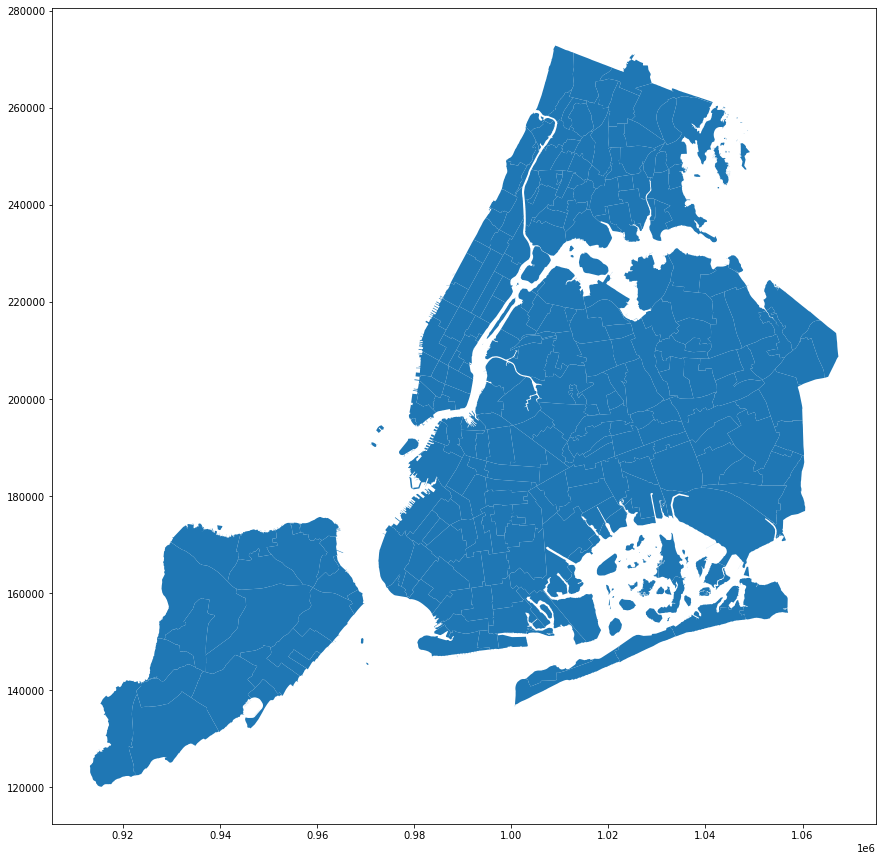

In [26]:
fig,ax = plt.subplots(figsize=(15,15))
nta_map.plot(ax=ax)

In [27]:
df2 = pd.read_csv('DOITT_SUBWAY_STATION_01_13SEPT2010.csv')
df2.head()

,URL,OBJECTID,NAME,the_geom,LINE,NOTES
0,http://web.mta.info/nyct/service/,1,Astor Pl,POINT (-73.99106999861966 40.73005400028978),4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s..."
1,http://web.mta.info/nyct/service/,2,Canal St,POINT (-74.00019299927328 40.71880300107709),4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s..."
2,http://web.mta.info/nyct/service/,3,50th St,POINT (-73.98384899986625 40.76172799961419),1-2,"1-all times, 2-nights"
3,http://web.mta.info/nyct/service/,4,Bergen St,POINT (-73.97499915116808 40.68086213682956),2-3-4,"4-nights, 3-all other times, 2-all times"
4,http://web.mta.info/nyct/service/,5,Pennsylvania Ave,POINT (-73.89488591154061 40.66471445143568),3-4,"4-nights, 3-all other times"


In [28]:
from shapely import wkt

df2['Coordinates'] = gpd.GeoSeries.from_wkt(df2['the_geom'])

In [29]:
df2.head()

,URL,OBJECTID,NAME,the_geom,LINE,NOTES,Coordinates
0,http://web.mta.info/nyct/service/,1,Astor Pl,POINT (-73.99106999861966 40.73005400028978),4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s...",POINT (-73.99107 40.73005)
1,http://web.mta.info/nyct/service/,2,Canal St,POINT (-74.00019299927328 40.71880300107709),4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s...",POINT (-74.00019 40.71880)
2,http://web.mta.info/nyct/service/,3,50th St,POINT (-73.98384899986625 40.76172799961419),1-2,"1-all times, 2-nights",POINT (-73.98385 40.76173)
3,http://web.mta.info/nyct/service/,4,Bergen St,POINT (-73.97499915116808 40.68086213682956),2-3-4,"4-nights, 3-all other times, 2-all times",POINT (-73.97500 40.68086)
4,http://web.mta.info/nyct/service/,5,Pennsylvania Ave,POINT (-73.89488591154061 40.66471445143568),3-4,"4-nights, 3-all other times",POINT (-73.89489 40.66471)


In [30]:
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in df2['Coordinates']]
geometry[:3]

In [37]:
geo_df = gpd.GeoDataFrame(df2, geometry=geometry)
geo_df.head()
geo_df = geo_df.set_crs('epsg:3857')

<AxesSubplot:>

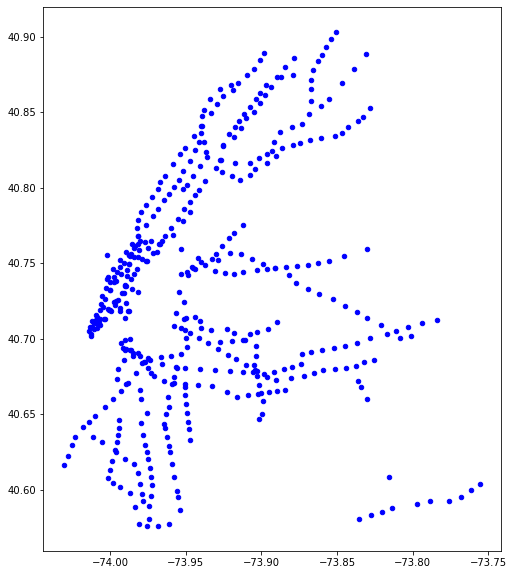

In [41]:
fig,ax = plt.subplots(figsize=(10,10))
geo_df.plot(ax=ax, markersize=20, color='blue', marker='o', label = 'Station')

<AxesSubplot:>

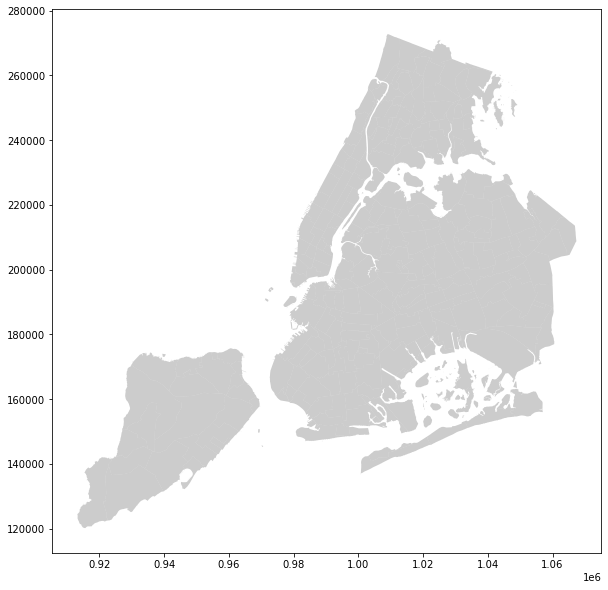

In [42]:
fig,ax = plt.subplots(figsize=(10,10))
nta_map.plot(ax=ax, alpha=.4,color='grey')
#geo_df.plot(ax=ax, markersize=20, color='blue', marker='o', label = 'Station')